## 1. Извлечение данных и изучение общей информации

Первым шагом настроим окружение: импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Просмотрим представленную информацию о пользователях «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

In [2]:
# информация о пользователях
users = pd.read_csv('/datasets/users.csv')
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
# информация о совершенных звонках
calls = pd.read_csv('/datasets/calls.csv')
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# информация о сообщениях
messages = pd.read_csv('/datasets/messages.csv')
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
# информация об интернет-сессиях
internet = pd.read_csv('/datasets/internet.csv')
display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
# информация о тарифах "Мегалайн"
tariffs = pd.read_csv('/datasets/tariffs.csv')
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Просмотрим информацию о типах данных таблиц

In [7]:
for data in [users, calls, messages, internet, tariffs]:
    display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

### Вывод:
Входные данные содержат информацию о 500 пользователях услуг оператора "Мегалайн":
- **информацию о пользователях.** Уникальный идентификатор; фамилия и имя пользователя; возраст; дата подключения и прекращения пользования тарифом; город проживания и название тарифа связи. Необходимо преобразовать тип данных столбцов "дата подключения тарифа" и "дата прекращения пользования тарифом" в формат времени.
- **информацию о совершенных звонках.**  Уникальный номер звонка; дата совершения звонка и длительность;идентификатор пользователя, сделавшего звонок. Требуется преобразовать дату совершения звонка в формат времени и обработать значения длительности звонков.
- **информацию о сообщениях.** Уникальный номер сообщения; дату отправки сообщения; идентификатор пользователя, отправившего сообщение. Необходимо изменить тип значений даты отправки сообщения на временной.
- **информацию об интернет-сессиях.** Уникальный номер сессии; объём потраченного за сессию интернет-трафика (в мегабайтах); дата выхода в интернет; идентификатор пользователя.
- **информацию о тарифах.** Указаны лимиты и стоимость услуг связи для тарифов "Ультра" и "Смарт".

Для выполнения дальнейших шагов требуется предобработка массива данных. Необходимо:
- преобразовать тип данных столбцов "дата подключения тарифа"; "дата прекращения пользования тарифом"; "дата совершения звонка"; "дата отправки сообщения" и "дата выхода в интернет" в формат даты.  
- обработать значения длительности совершенных звонков и строки с данными пользователей.

## 2. Подготовка данных
### 2.1 Предобработка данных

При просмотре данных пользователей обнаружено 2 строки с пропущенными значениями в столбцах со всеми видами связи, просмотрим эти строки. Удалим записи для данных клиентов, поскольку время пользования тарифом составляет около недели. 

In [8]:
display(users[users['user_id'] == 1371])
display(users[users['user_id'] == 1128])

# удалим найденные строки пользователей с id 1128 и 1371,
users = users[(users['user_id'] != 1128) & (users['user_id'] != 1371)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


Преобразуем из строки в дату тип данных  следующих столбцов:
- "дата подключения тарифа";
- "дата прекращения пользования тарифом";
- "дата совершения звонка";
- "дата отправки сообщения";
- "дата выхода в интернет".

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Обработаем значения длительности звонков пользователей "Мегалайн"

In [10]:
# просмотрим уникальные значения длительности звонков и их количество
display(calls['duration'].value_counts())

# рассчитаем долю звонков с длительностью 0 минут
duration_null_fraction = len(calls[calls['duration'] == 0.00]) / len(calls)
print('Доля звонков с длительностью 0.0 минут составляет: {:.1%}'.format(duration_null_fraction))

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

Доля звонков с длительностью 0.0 минут составляет: 19.6%


Предположим, что если длительность звонков равна 0 минут, такие звонки относятся к пропущенным входящим, или при исходящем звонке пользователь не дозвонился до собеседника.

Поскольку по условиям тарифа «Мегалайн» округляет вверх значения минут и мегабайтов, обработаем столбцы с длительностью звонков и объёмом потраченного интернет-трафика.

In [11]:
calls['duration'] = calls['duration'].apply(np.ceil)

# проверим работу выполненных действий
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [12]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

#### 2.2 Расчет услуг связи для пользователей "Мегалайн"
Определим для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

##### 2.2.1. Количество сделанных звонков и израсходованных минут разговора по месяцам

In [13]:
# добавим столбец с данными месяца оказания услуги связи
calls['month'] = calls['call_date'].dt.month
display(calls.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [14]:
# сформируем сводную таблицу по длительности и количеству совершенных звонков по месяцам
calls_per_month = calls.pivot_table(index=['user_id', 'month'], values=['id', 'duration'], aggfunc={'duration': 'sum', 'id': 'count'})
calls_per_month.columns = ['call_duration', 'call_count']

display(calls_per_month.head())

call_duration  call_count
user_id month                           
1000    5              159.0          22
        6              172.0          43
        7              340.0          47
        8              408.0          52
        9              466.0          58

##### 2.2.2. Количество отправленных сообщений по месяцам

In [15]:
# получим сводную таблицу по числу отправленных сообщений по месяцам
messages['month'] = messages['message_date'].dt.month
messages_per_month = messages.pivot_table\
(index=['user_id', 'month'], values='id', aggfunc = 'count')
messages_per_month.columns = ['message_count']

display(messages_per_month.head())

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57

##### 2.2.3. Объем израсходованного интернет-трафика по месяцам

In [16]:
# получим сводную таблицу по объему интернет-трафика по месяцам
internet['month'] = internet['session_date'].dt.month
internet_per_month = internet.pivot_table\
(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

display(internet_per_month.head())

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0

Объединим данные о количестве сделанных звонков и израсходованных минут разговора, отправленных сообщений и объеме израсходованного интернет-трафика по месяцам в единую таблицу.

In [17]:
# создадим список и таблиц и объединим методом join()
dfs = [calls_per_month, messages_per_month, internet_per_month]
grouped_data = pd.DataFrame().join(dfs, how="outer")

# удалим уровни мультииндекса для возможности объединить сгруппированную таблицу
# с тарифным планом пользователей
grouped_data.reset_index(inplace=True)

# добавим в сгруппированную таблицу с расходованием услуг свзязи столбец с названием тарифа
# для этого создадим датафрейм только с интересующими столбцами из массива users
sub_users = users[['user_id', 'tariff']]

# объединим таблицы методом merge()
megaline_data = grouped_data.merge(sub_users, how="outer")

# просмотри 5 первых строк объединенного датафрейма
display(megaline_data.head())

,user_id,month,call_duration,call_count,message_count,mb_used,tariff
0,1000,5,159.0,22.0,22.0,2256.0,ultra
1,1000,6,172.0,43.0,60.0,23257.0,ultra
2,1000,7,340.0,47.0,75.0,14016.0,ultra
3,1000,8,408.0,52.0,81.0,14070.0,ultra
4,1000,9,466.0,58.0,57.0,14581.0,ultra


#### Обработка пропущенных значений
Предположим, что если в сгруппированных данных пропущены значения, то минуты, сообщения и интернет-трафик в рамках тарифа не расходовались. Заменим пропуски в соответствующих столбах нулями.

In [18]:
# просмотрим в каких столбцах отсутствуют данные
display(megaline_data.isnull().sum())

megaline_data = megaline_data.fillna(0)

user_id            0
month              0
call_duration     40
call_count        40
message_count    497
mb_used           11
tariff             0
dtype: int64

"Мегалайн" по условиям предоставления услуг округляет значения до целого. Переведем данные месяца пользования тарифом и столбцы с видами связи в целочисленный тип.

In [19]:
columns = ['month', 'call_duration', 'call_count', 'message_count', 'mb_used']
megaline_data[columns] = megaline_data[columns].astype('int')

# просмотрим работу выполненных действий
megaline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id          3214 non-null int64
month            3214 non-null int64
call_duration    3214 non-null int64
call_count       3214 non-null int64
message_count    3214 non-null int64
mb_used          3214 non-null int64
tariff           3214 non-null object
dtypes: int64(6), object(1)
memory usage: 200.9+ KB


In [20]:
# сгруппируем данные по уникальному идентификатору пользователя и месяцу использования услуг связи
megaline_data.set_index(['user_id', 'month'], inplace=True)
display(megaline_data)

call_duration  call_count  message_count  mb_used tariff
user_id month                                                          
1000    5                159          22             22     2256  ultra
        6                172          43             60    23257  ultra
        7                340          47             75    14016  ultra
        8                408          52             81    14070  ultra
        9                466          58             57    14581  ultra
...                      ...         ...            ...      ...    ...
1498    10               247          41             42    20604  smart
1499    9                 70           9             11     1848  smart
        10               449          68             48    17809  smart
        11               612          74             59    17984  smart
        12               492          69             66    13077  smart

[3214 rows x 5 columns]

##### 2.4. Помесячная выручка с каждого пользователя
Рассчитаем помесячную выручку с каждого пользователя "Мегалайна". Для этого из суммарного количества звонков, сообщений и интернет-трафика вычтем бесплатный лимит по тарифу; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

In [21]:
# создадим функцию для расчета помесячной выручки с каждого пользователя
def megaline_income(row):
    call_duration = row['call_duration']
    message_count = row['message_count']
    internet_used = row['mb_used']
    tariff = row['tariff']

    # рассчитаем доходность тарифа "Смарт"
    if tariff == 'smart':
        # стоимость звонков сверх тарифа
        call_duration_add = (call_duration - tariffs.loc[0, 'minutes_included'])\
        *tariffs.loc[0, 'rub_per_minute']
               
        # стоимость смс сверх тарифа
        message_count_add = (message_count - tariffs.loc[0, 'messages_included'])\
        *tariffs.loc[0, 'rub_per_message']
                
        # стоимость интернета сверх тарифа
        internet_add = ((internet_used - tariffs.loc[0, 'mb_per_month_included'])//1024 + 1)\
        *tariffs.loc[0, 'rub_per_gb']
                      
        # когда израсходованных услуг меньше лимита, значение равняется 0
        if call_duration_add < 0:
            call_duration_add = 0
        if message_count_add < 0:
            message_count_add = 0
        if internet_add < 0:
            internet_add = 0
            
        # общий доход от тарифа "Смарт"
        total_income = call_duration_add + message_count_add + internet_add\
        + tariffs.loc[0, 'rub_monthly_fee']

    # рассчитаем доходность тарифа "Ультра"
    elif tariff == 'ultra':
        # стоимость звонков сверх тарифа
        call_duration_add = (call_duration - tariffs.loc[1, 'minutes_included'])\
        *tariffs.loc[1, 'rub_per_minute']
                
        # стоимость смс сверх тарифа
        message_count_add = (message_count - tariffs.loc[1, 'messages_included'])\
        *tariffs.loc[1, 'rub_per_message']
                
        # стоимость интернета сверх тарифа
        internet_add = ((internet_used - tariffs.loc[1, 'mb_per_month_included'])//1024 + 1)\
        *tariffs.loc[1, 'rub_per_gb']
                    
        # когда израсходованных услуг меньше лимита, значение равняется 0
        if call_duration_add < 0:
            call_duration_add = 0
        if message_count_add < 0:
            message_count_add = 0
        if internet_add < 0:
            internet_add = 0
            
        # общий доход от тарифа "Ультра"
        total_income = call_duration_add + message_count_add + internet_add\
        + tariffs.loc[1, 'rub_monthly_fee']

    return total_income.round(decimals=2)

# применим функцию ко всем строкам сгруппированной по месяцам таблицы с использованием услуг связи 
megaline_data['income'] = megaline_data.apply(megaline_income, axis=1)

In [22]:
display(megaline_data.head(10))

call_duration  call_count  message_count  mb_used tariff  \
user_id month                                                             
1000    5                159          22             22     2256  ultra   
        6                172          43             60    23257  ultra   
        7                340          47             75    14016  ultra   
        8                408          52             81    14070  ultra   
        9                466          58             57    14581  ultra   
        10               350          57             73    14717  ultra   
        11               338          43             58    14768  ultra   
        12               333          46             70     9827  ultra   
1001    11               430          59              0    18452  smart   
        12               414          63              0    14053  smart   

               income  
user_id month          
1000    5        1950  
        6        1950  
        7        1950  
        8        1950  
        9        1950  
        10       1950  
        11       1950  
        12       1950  
1001    11       1350  
        12        550

## 3. Анализ данных

Определим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

In [23]:
# создадим таблицу со средними значениями услуг связи в месяц
megaline_pivot = megaline_data.\
pivot_table(index='user_id', values=['call_duration', 'message_count', 'mb_used'], aggfunc='median')

# добавим к полученной таблице столбец с указанием тарифа
megaline_pivot.reset_index(inplace=True)
megaline_median = megaline_pivot.merge(sub_users, how="outer")

# приведем тип данных к целочисленному
columns_ = ['call_duration', 'message_count', 'mb_used']
megaline_median[columns_] = megaline_median[columns_].astype('int')

# выведем первые 5 строк полученной таблицы
display(megaline_median.head())

,user_id,call_duration,mb_used,message_count,tariff
0,1000,339,14325,65,ultra
1,1001,422,16252,0,smart
2,1002,214,17601,11,smart
3,1003,824,11368,83,ultra
4,1004,132,17828,154,ultra


Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [25]:
# посчитаем статистические показатели для длительности звонков
call_duration_stat = megaline_median.pivot_table\
(index='tariff', aggfunc={'call_duration':['median', np.var, np.std]})


# посчитаем статистические показатели для объема интернет-трафика
mb_used_stat = megaline_median.pivot_table\
(index='tariff', aggfunc={'mb_used':['median', np.var, np.std]})
# поделим значение дисперсии на 1000000
mb_used_stat['mb_used','var'][0] = mb_used_stat['mb_used','var'][0]/1000000
mb_used_stat['mb_used','var'][1] = mb_used_stat['mb_used','var'][1]/1000000
#изменим порядок величины в названии столбца дисперсии
mb_used_stat.columns.set_levels(['median','std','var, млн'],level=1,inplace=True)


# посчитаем статистические показатели для количества сообщений
message_count_stat = megaline_median.pivot_table\
(index='tariff', aggfunc={'message_count':['median', np.var, np.std]})

In [26]:
# объединим таблицу со стастистическими показателями в единую
dfs_ = [call_duration_stat, mb_used_stat, message_count_stat]
stat_data = pd.DataFrame().join(dfs_, how="outer")
display(stat_data.round(decimals=2))

call_duration                    mb_used                    \
              median     std       var   median      std var, млн   
tariff                                                              
smart          439.5  160.27  25686.08  16948.0  4179.55    17.47   
ultra          535.0  303.76  92272.19  19750.5  8901.17    79.23   

       message_count                  
              median    std      var  
tariff                                
smart           28.0  28.00   783.78  
ultra           47.0  49.22  2422.65

Для визуальной оценки характеристик распределения построим категориальный график вида boxplot и построим диаграмму размаха для каждого вида мобильной связи.

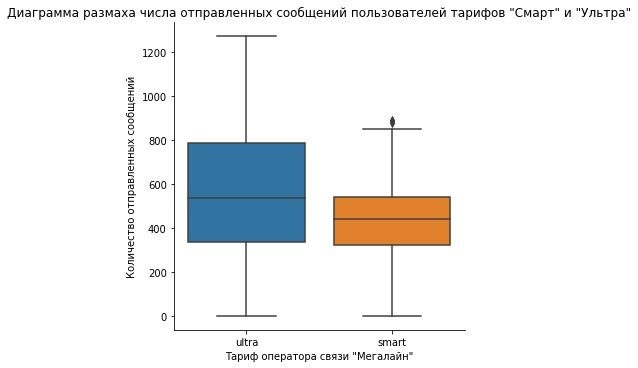

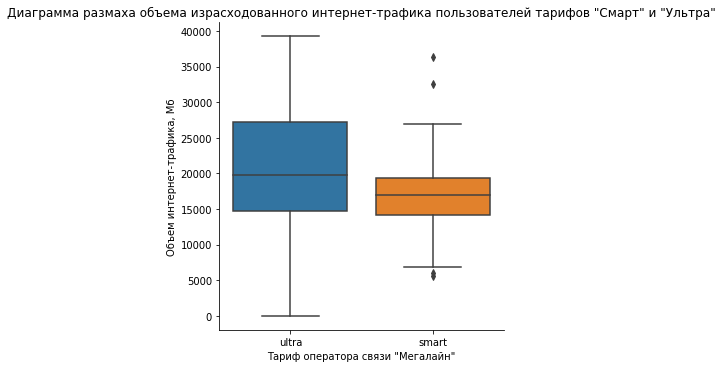

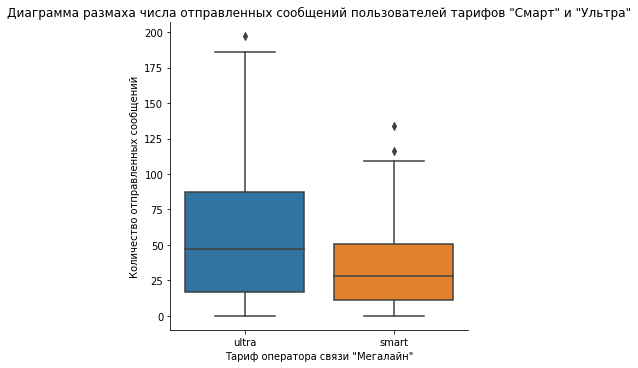

In [27]:
types = ['call_duration', 'mb_used', 'message_count']
for element in types:
    sns.catplot(x="tariff", y=element, kind = 'box', data=megaline_median)
    plt.xlabel('Тариф оператора связи "Мегалайн"')
    if element == 'call_duration':
        plt.title('Диаграмма размаха длительности звонков пользователей тарифов "Смарт" и "Ультра"')
        plt.ylabel('Длительность звонка, мин')
    if element == 'mb_used':
        plt.title('Диаграмма размаха объема израсходованного интернет-трафика пользователей тарифов "Смарт" и "Ультра"')
        plt.ylabel('Объем интернет-трафика, Мб')
    else:
        plt.title('Диаграмма размаха числа отправленных сообщений пользователей тарифов "Смарт" и "Ультра"')
        plt.ylabel('Количество отправленных сообщений')

### Вывод
Обнаружено, что для тарифа "Ультра", по сравнению с тарифом "Смарт", характерен больший разброс количества потраченных минут, сообщений и интернет-трафика. Стандартное отклонение для тарифных планов "Ультра" и "Смарт"составляет **~303** и **~160**, соответственно. При этом для более дешевого тарифа "Смарт" наблюдается большее число выбросов значений.

Необходимо отметить, что в среднем пользователи тарифа "Ультра" из предоставленных тарифом лимитов расходуют только 18% минут разговора, 64% интернет-трафика и практически не пользуются смс сообщениями. Основное количество значений израсходованных минут, сообщений и интернета находится в рамках выбранного тарифа, следовательно обладатели тарифа "Ультра" не будут дополнительно оплачивать услуги сверх тарифного пакета.

Пользователи тарифа "Смарт" в среднем практически полностью расходуют 500 минут разговора, но предоставленного объема интернет-трафика им зачастую не хватает(16950 Мб против 15360 Мб, указанных в тарифе). Следовательно, это приводит к дополнительным расходам на интернет помимо фиксированной ежемесячной абонентской платы.

Построим распределения длительности звонков, числа отправленных сообщений и потраченного интернет-трафика пользователей тарифов "Смарт" и "Ультра".

In [28]:
# отфильтруем массив данных по тарифам "Смарт" и "Ультра"
smart = megaline_median.loc[megaline_median['tariff'] == 'smart']
ultra = megaline_median.loc[megaline_median['tariff'] == 'ultra']

# создадим функцию для отображения распределения видов связи для каждого тарифного плана
def megaline_plot(type_of_com):
    sns.distplot(smart[type_of_com], hist_kws=dict(edgecolor="w", linewidth=0.5), kde=False, bins=20)
    sns.distplot(ultra[type_of_com], hist_kws=dict(edgecolor="w", linewidth=0.5), kde=False, color="g", bins=20)
    plt.legend(['smart', 'ultra'])  

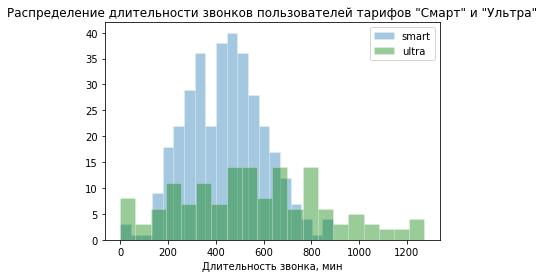

count    350.000000
mean     437.354286
std      160.268776
min        0.000000
25%      323.250000
50%      439.500000
75%      540.750000
max      891.000000
Name: call_duration, dtype: float64

count     148.000000
mean      557.391892
std       303.763371
min         0.000000
25%       336.500000
50%       535.000000
75%       786.250000
max      1273.000000
Name: call_duration, dtype: float64

In [29]:
megaline_plot('call_duration')
plt.title('Распределение длительности звонков пользователей тарифов "Смарт" и "Ультра"')
plt.xlabel('Длительность звонка, мин')
plt.show()
display(smart['call_duration'].describe())
display(ultra['call_duration'].describe())

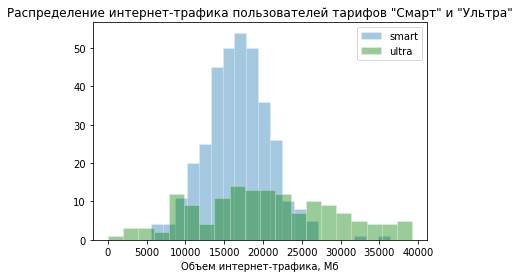

count      350.000000
mean     16853.697143
std       4179.547222
min       5545.000000
25%      14204.000000
50%      16948.000000
75%      19325.000000
max      36319.000000
Name: mb_used, dtype: float64

count      148.000000
mean     20322.385135
std       8901.172993
min          0.000000
25%      14698.500000
50%      19750.500000
75%      27234.250000
max      39230.000000
Name: mb_used, dtype: float64

In [30]:
megaline_plot('mb_used')
plt.title('Распределение интернет-трафика пользователей тарифов "Смарт" и "Ультра"')
plt.xlabel('Объем интернет-трафика, Мб')
plt.show()
display(smart['mb_used'].describe())
display(ultra['mb_used'].describe())

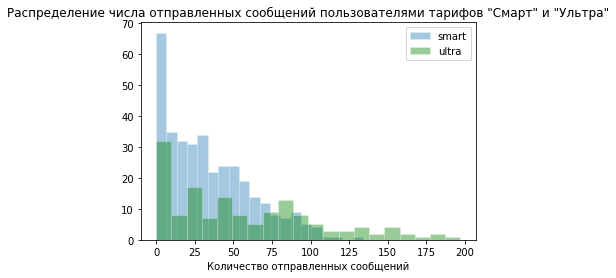

count    350.000000
mean      33.674286
std       27.996156
min        0.000000
25%       11.000000
50%       28.000000
75%       50.750000
max      134.000000
Name: message_count, dtype: float64

count    148.000000
mean      56.891892
std       49.220472
min        0.000000
25%       16.750000
50%       47.000000
75%       87.000000
max      197.000000
Name: message_count, dtype: float64

In [31]:
megaline_plot('message_count')
plt.title('Распределение числа отправленных сообщений пользователями тарифов "Смарт" и "Ультра"')
plt.xlabel('Количество отправленных сообщений')
plt.show()
display(smart['message_count'].describe())
display(ultra['message_count'].describe())

Наблюдается нормальное симметричное распределение набора данных длительности разговоров и объема интернет-трафика для тарифов "Ультра" и "Смарт". Об этом наглядно демонстрируют вид диаграмм распределения и графиков вида boxplot.
Датасет количества отправленных сообщений имееь асимметричный вид со скошенностью значений в правую сторону.
Из представленных диаграмм видно, что для пользователей тарифа "Смарт" наблюдается узкое распределение количество минут, сообщений и объема интернет-трафика с явно выраженными пиками в области лимита предоставленных услуг(500 минут разговора и 15 Гб интернет-трафика). В то время как для тарифа "Ультра" значения количества затраченных минут, сообщений и интернета "размазаны" по всему диапазону графика.

Возможно, это связано с тем, что клиенты "Мегалайн" при подключении тарифа "Смарт" не хотели сильно переплачивать и осознавали, какой объем минут, смс и интернета в месяц им необходим для комфортного общения. Тогда как пользователи тарифа "Ультра" предпочли более дорогой тариф с большим объемом предоставленных услуг, не задумываясь и не ориентируясь на лимиты по тарифному плану.

### 4. Проверка гипотез

Для проверки гипотез о равенстве средних двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind().

##### 4.1. Сравнение средней выручки пользователей тарифов "Ультра" и "Смарт"

Сформулируем нулевую и альтернативную гипотезы. Зададим пороговое значение *aplha* = 5%.

$H_0$ - средние выручки пользователей тарифов «Ультра» и «Смарт» равны между собой;

$H_1$ - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

α = 5%

In [32]:
# отфильтруем данные по пользователям тарифов "Смарт" и "Ультра"
smart_ = megaline_data[megaline_data['tariff'] == 'smart']['income']
ultra_ = megaline_data[megaline_data['tariff'] == 'ultra']['income']

alpha = .05

#Рассчитаем дисперсию значений выручки от тарифов "Смарт" и "Ультра"
smart_variance = np.var(smart_)
ultra_variance = np.var(ultra_)

display(ultra_variance)
display(smart_variance)


# сравним дисперсии между собой
var_ratio = (smart_variance - ultra_variance) / ultra_variance

print('Дисперсия выручки от тарифа "Смарт" на {:.2%} больше по сравнению с тарифом "Ультра"'.\
      format(var_ratio))

# дисперсии выборок значительно отличаются между собой, установим параметр equal_var = False
results = st.ttest_ind(smart_, ultra_, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

143345.5641732588

674091.839538801

Дисперсия выручки от тарифа "Смарт" на 370.26% больше по сравнению с тарифом "Ультра"
p-значение: 3.7780713628111093e-246
Отвергаем нулевую гипотезу


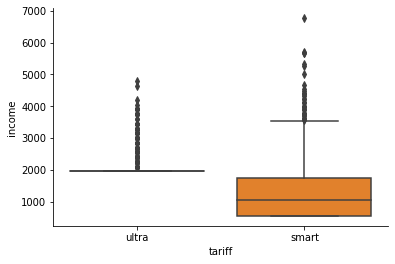

In [33]:
sns.boxplot(x="tariff", y="income", data=megaline_data)
sns.despine()

In [34]:
display(megaline_data.pivot_table(index='tariff', values='income', aggfunc='median'))

,income
tariff,
smart,1038
ultra,1950


С вероятностью 95% можно утверждать, что тариф "Ультра" приносит больший доход оператору "Мегалайн", по сравнению с тарифом "Смарт".
Обнаружено, что в среднем пользователи тарифного плана "Ультра" тратят на услуги свзяи примерно в 2 раза по сравнению с пользователями тарифа "Смарт". При этом первые оплачивают только фиксированную абонентскую плату 1950 рублей, им достаточно предоставленного объема услуг связи и не расходуют услуги сверх пакета. В то время как пользователям тарифа "Смарт" недостаточно лимита тарифного плана, что приводит к дополнительным расходам на мобильную связь примерно на ~490 рублей сверх тарифа. 

##### 4.2. Сравнение средней выручки пользователей из Москвы и других регионов

In [35]:
# добавим в таблицу столбец с указанием города проживания пользователя
# для этого создадим датафрейм только с интересующими столбцами из массива users
sub_users_city = users[['user_id', 'city']]

# сбросим индексы датафрейма для добавления столбца с указанием города
megaline_data.reset_index(inplace=True)

# объединим таблицы методом merge()
megaline_data_city = megaline_data.merge(sub_users_city, how="outer")
display(megaline_data_city.head())

,user_id,month,call_duration,call_count,message_count,mb_used,tariff,income,city
0,1000,5,159,22,22,2256,ultra,1950,Краснодар
1,1000,6,172,43,60,23257,ultra,1950,Краснодар
2,1000,7,340,47,75,14016,ultra,1950,Краснодар
3,1000,8,408,52,81,14070,ultra,1950,Краснодар
4,1000,9,466,58,57,14581,ultra,1950,Краснодар


Произведем группировку городов расположения пользователя на Москву и другие регионы методом where().

In [36]:
megaline_data_city['group_city'] = megaline_data_city['city'].\
where(megaline_data_city['city'] == 'Москва', 'Другой регион')
display(megaline_data_city.head())

,user_id,month,call_duration,call_count,message_count,mb_used,tariff,income,city,group_city
0,1000,5,159,22,22,2256,ultra,1950,Краснодар,Другой регион
1,1000,6,172,43,60,23257,ultra,1950,Краснодар,Другой регион
2,1000,7,340,47,75,14016,ultra,1950,Краснодар,Другой регион
3,1000,8,408,52,81,14070,ultra,1950,Краснодар,Другой регион
4,1000,9,466,58,57,14581,ultra,1950,Краснодар,Другой регион


Сформулируем нулевую и альтернативную гипотезы. Зададим пороговое значение *aplha* = 5%.

$H_0$ - средние выручки пользователей из Москвы и других регионов равны между собой;

$H_1$ - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

α = 5%

In [37]:
# разделим данные пользователей на категории - Москва и другие регионы
Moscow = megaline_data_city[megaline_data_city['group_city'] == 'Москва']['income']
Others = megaline_data_city[megaline_data_city['group_city'] != 'Москва']['income']

alpha = .05

#Рассчитаем дисперсию значений выручки для пользователей из Москвы и других регионов
Moscow_variance = np.var(Moscow)
Others_variance = np.var(Others)

# сравним дисперсии между собой
var_ratio = (Others_variance- Moscow_variance) / Moscow_variance
print('Дисперсия выручки от пользователей из Москвы на {:.2%} меньше по сравнению с другими пользователями'.\
      format(var_ratio))

# дисперсии выборок отличаются между собой, установим параметр equal_var = False
results = st.ttest_ind(Moscow, Others, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Дисперсия выручки от пользователей из Москвы на 16.21% меньше по сравнению с другими пользователями
p-значение: 0.5141223660102104
Не получилось отвергнуть нулевую гипотезу


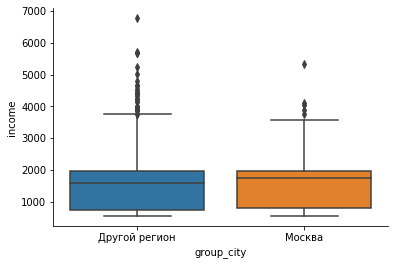

In [38]:
sns.boxplot(x='group_city', y ='income', data=megaline_data_city)
sns.despine()

In [39]:
display(megaline_data_city.pivot_table(index='group_city', values='income', aggfunc='median'))

,income
group_city,
Другой регион,1587
Москва,1750


Полученные в ходе эксперимента данные не противоречат нулевой гипотезе, что средние выручки пользователей из Москвы и других регионов равны между собой, и у нас нет оснований отбросить её. Доход от столичных пользователей услугами оператора "Мегалайн" практически не отличаются от пользователей из регионов.

# Общий вывод
Проведено исследование с целью определения наиболее перспективного тарифа для телеком компании "Мегалайн". На основе статистического анализа данных установлено, что доходность тарифа "Ультра" с большим объемом включенных в пакет минут, сообщений и интернет-трафика выше по сравнению с тарифом "Смарт". Средняя месячная выручка от тарифа "Ультра" и "Смарт" составляет **1950** и **1038 рублей**, соответственно.

По результатам проведенного анализа поведения клиентов оператора связи "Мегалайн" можно сделать следующие заключения:
1. Пользователи тарифа "Ультра" не расходуют в полном объеме предоставленные тарифным планом услуги. В среднем платеж за услуги связи равен ежемесячной абонентской плате согласно условиям тарифа.
2. В среднем пользователям тарифа "Смарт" недостаточно пакета услуг, указанного в тарифном плане, что приводит к дополнительным расходам на мобильную связь примерно на ~490 рублей сверх тарифа.
3. Среднемесячный доход компании "Мегалайн" практически одинакова для клиентов из Москвы и других регионов и составляет **~1750** и **~1587 рублей**, соответственно.